In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function

# Integration

In [2]:
from scipy import integrate

## Q1: integrating an analytic function

Numerical integration methods work differently depending on whether you have the analytic function available (in which case you can evaluate it freely at any point you please) or if it is sampled for you.

Consider the function $f(x) = e^{-x^2}$.  We want to integrate this from $[-5, 5]$.  The
analytic integral is not easily obtained.  Use `integrate.quad` to do the integration.

---
### My solution:

notes to self:
`quad` gives "analytic" sol (not sampled), but it is slow/expensive

In [3]:
# integrand
def func(x):
    return np.exp(-1. * x**2)

# limits of integration
a = -5.
b = 5.

result, error = integrate.quad(func, a, b)
print("The integral of f(x) from a = {:1.2f} to b = {:1.2f} is {:6.2f} +/- {:6.3e}.".format(a, b, result, error))

The integral of f(x) from a = -5.00 to b = 5.00 is   1.77 +/- 4.626e-14.


---
## Q2: integrating a sampled function

Consider now that you have data that represents a function sampled a `N` points, but you don't know the analytic form of the function.  

Here, we create the sampling here for a Gaussian and we will do the same integral as in Q1.

---
### My solution:
Begin by getting a sample of $N$ evenly-spaced points, `x`, and getting the samples of the function $f(x) = e^{-x^2}$.

Then plot the samples and the true function.

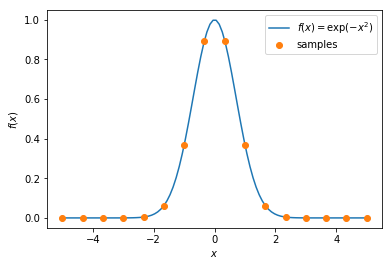

In [4]:
N = 16
x_sample = np.linspace(a, b, N) # points at which to take sample
f_sample = func(x_sample) # samples

xvals = np.linspace(a, b, 100) # x values for plotting

# make a quick plot
plt.figure()
plt.plot(xvals, func(xvals), label=r"$f(x) = \exp\left(-x^2\right)$")
plt.plot(x_sample, f_sample, 'o', label="samples")
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

---
Compute the integral of this sampled function using Simpson's method (`integrate.simps`).  Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes.  Simpson's method is 4-th order accurate, which means that the error should decrease by $2^4$ when we double the number of sample points.

Optional: Make a plot of the error (compared to the analytic integral from Q1) vs. N

---
### My solution:
Calculate the integral using different numbers $N$ of points:

In [5]:
Npts = [2**i for i in range(4,10)] # vary the number of points used
results = [] # will hold result of integration for each N in Npts

# do the integration for each N
for N in Npts:
    xN = np.linspace(a, b, N, endpoint=True)
    fN = func(xN)
    results.append(integrate.simps(fN, xN))
    # print out results
    print("N = {:4d}, result = {}".format(N, results[-1]))

N =   16, result = 1.77245385087
N =   32, result = 1.77245385092
N =   64, result = 1.7724538509
N =  128, result = 1.7724538509
N =  256, result = 1.7724538509
N =  512, result = 1.7724538509


Plot the result as a function of $N$, and compare to the true solution of:

$$\int_{-5}^5 e^{-x^2} = \sqrt{\pi} \ \textrm{erf}(5) \approx 1.77245$$

We can evaluate this expression using the function `scipy.special.erf()`:

In [6]:
from scipy.special import erf
true_result = np.sqrt(np.pi) * erf(5.0) # true result of integration

Let's compare this to the result from problem 1:

In [7]:
print(true_result - result)

-2.22044604925e-16


We will plot the error in the result as a function of the number of points used, which will be defined as the difference between the true result and the approximation.

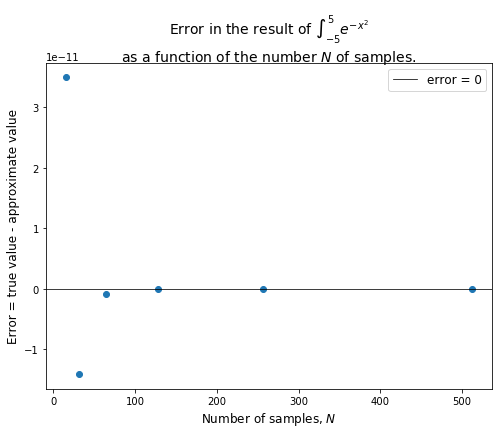

In [8]:
# make the plot
fig, ax = plt.subplots(figsize=(8,6))

# set title and axis labels
ax.set_title(r"Error in the result of $\int_{-5}^5 e^{-x^2}$" + "\n" + r"as a function of the number $N$ of samples.", 
            fontsize=14)
ax.set_xlabel(r"Number of samples, $N$", fontsize=12)
ax.set_ylabel("Error = true value - approximate value", fontsize=12)

# plot the true result - approximate result as a function of the number of points
ax.plot(Npts, true_result - np.array(results), 'o')
# plot a line showing where the error = 0
ax.axhline(color='k', lw=0.75, label="error = 0")

ax.legend(fontsize=12)
plt.show()

---
# Interpolation

In [9]:
from scipy import interpolate

## Q3: interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function.  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

Try some of the different interolation routines.  `interpolate.interp1d` takes a `kind` argument that let's you choose the order of the interpolation.  Measure the error in the method, by comparing the interpolated result with the actual function value.  Also, try using cubic splines (look at `CubicSpline`)

Try plotting the resulting interpolant.

---
### My solution:

I'll begin by testing $f(x) = e^{-x^2}$:

In [10]:
# choose N and get N samples of it over a range [xmin, xmax]
xmin = -5.
xmax = 5.
N = 16

# get N samples of f(x)
xsamples = np.linspace(xmin, xmax, N, endpoint=True)
fsamples = func(xsamples)

# get true values
xvals = np.linspace(xmin, xmax, 500)
fvals = func(xvals)

Look at all of the interpolation methods:

In [11]:
# interpolation methods
methods = ['linear', 'slinear', 'quadratic', 'cubic']

Make a plot with 3 panels:

- The first will be a plot of the analytic function, the samples of the function, and the interpolated function.

- The second will be a plot of the error, defined as (analytic function - interpolated function).

- The thirs will be the absolute value of the error on a log scale.

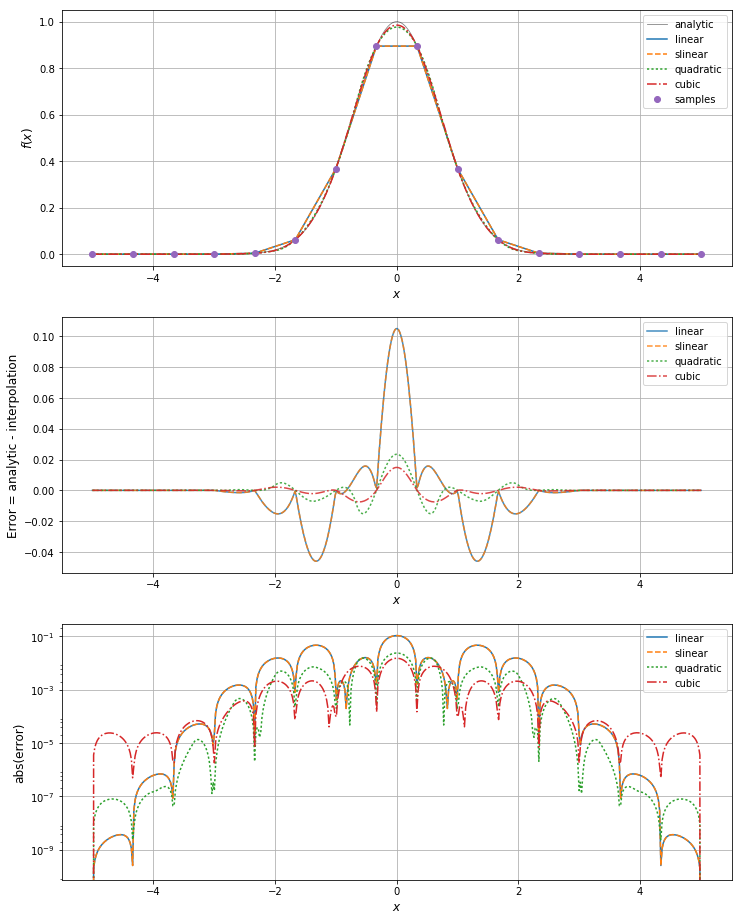

In [12]:
fig = plt.figure(figsize=(12,16))

# 1st panel
ax1 = plt.subplot(311)
ax1.set_ylabel(r"$f(x)$", fontsize=12)
ax1.plot(xvals, fvals, color='k', lw=0.8, alpha=0.5, label="analytic")
# 2nd panel
ax2 = plt.subplot(312)
ax2.set_ylabel("Error = analytic - interpolation", fontsize=12)
# 3rd panel
ax3 = plt.subplot(313)
ax3.set_yscale('log')
ax3.set_ylabel("abs(error)", fontsize=12)

# do the interpolation and plot the results
lines = ['-', '--', ':', '-.']
for method, line in zip(methods, lines):
    f_interp = interpolate.interp1d(xsamples, fsamples, kind=method)
    ax1.plot(xvals, f_interp(xvals), label=method, ls=line)
    ax2.plot(xvals, fvals-f_interp(xvals), label=method, ls=line, alpha=0.85)
    ax3.plot(xvals, abs(fvals-f_interp(xvals)), label=method, ls=line)
    
# plot the samples
ax1.plot(xsamples, fsamples, 'o', label="samples")

# set the legend and the xlabel
for ax in [ax1, ax2, ax3]:
    ax.legend()
    ax.grid()
    ax.set_xlabel(r"$x$", fontsize=12)
    
plt.show()

Repeat the above using `optimize.CublicSpline()`:

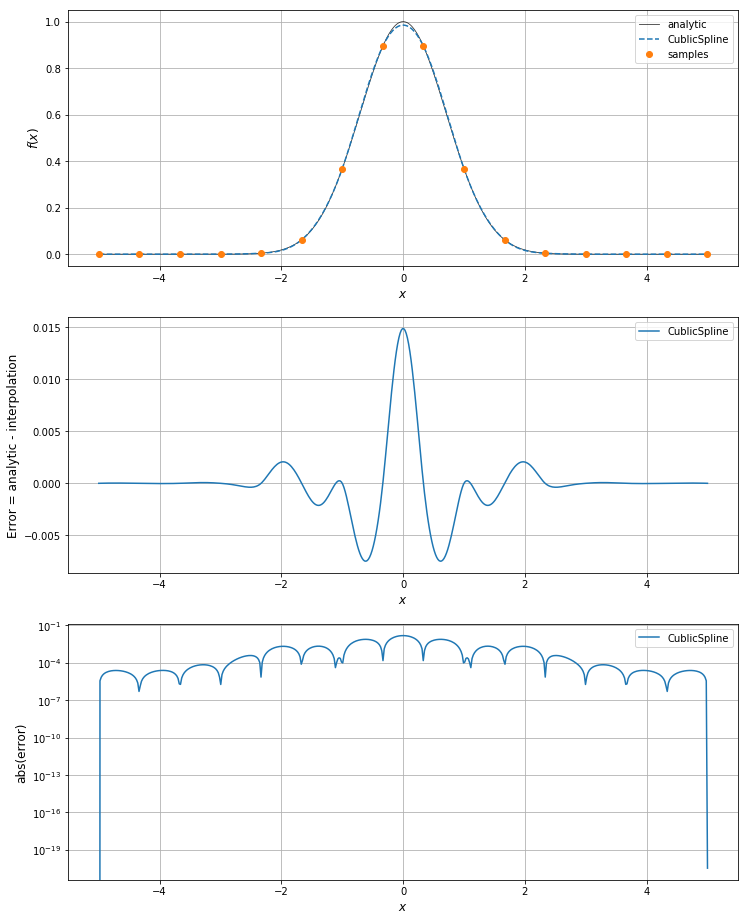

In [13]:
fig = plt.figure(figsize=(12,16))

# 1st panel
ax1 = plt.subplot(311)
ax1.set_ylabel(r"$f(x)$", fontsize=12)
ax1.plot(xvals, fvals, color='k', lw=0.8, alpha=0.8, label="analytic")
# 2nd panel
ax2 = plt.subplot(312)
ax2.set_ylabel("Error = analytic - interpolation", fontsize=12)
# 3rd panel
ax3 = plt.subplot(313)
ax3.set_yscale('log')
ax3.set_ylabel("abs(error)", fontsize=12)

# do the interpolation and plot the results
f_interp = interpolate.CubicSpline(xsamples, fsamples)
ax1.plot(xvals, f_interp(xvals), label="CublicSpline", ls='--')
ax2.plot(xvals, fvals-f_interp(xvals), label="CublicSpline")
ax3.plot(xvals, abs(fvals-f_interp(xvals)), label="CublicSpline")
    
# plot the samples
ax1.plot(xsamples, fsamples, 'o', label="samples")

# set the legend and the xlabel
for ax in [ax1, ax2, ax3]:
    ax.legend()
    ax.grid()
    ax.set_xlabel(r"$x$", fontsize=12)
    
plt.show()

---
# Root Finding

## Q4: scalar function roots

Consider the function
$$q(x) = x^3 - 2x^2 - 11x + 12$$
This has 3 roots, but is known to cause problems for some root-finding methods (it exhibits basis of attraction: https://en.wikipedia.org/wiki/Newton%27s_method#Basins_of_attraction -- very closely spaced initial guesses leave to very different roots)

Use the SciPy `optimize.brentq` method to find the roots.  You might need to play around with the intervals to find all 3 roots (try plotting the function to help)

---
### My solution:

In [18]:
from scipy import optimize

Define the function and plot it:

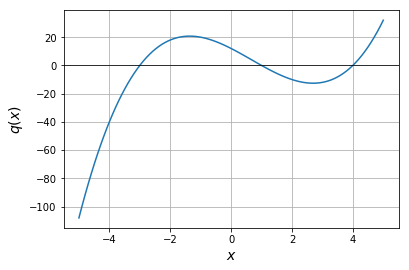

In [19]:
def q(x):
    return x**3 - 2. * x**2 - 11.*x + 12

xmin = -5.
xmax = 5.
xvals = np.linspace(xmin, xmax, 100)

fig, ax = plt.subplots()
ax.plot(xvals, q(xvals))
ax.axhline(color='k', lw=0.75)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$q(x)$", fontsize=14)
ax.grid()
plt.show()

Looking at the plot above, we can guess the bounds for each root $x_i, i = 1, 2, 3$:

$$-4 < x_1 < -2, \ \ \ \ 0 < x_2 < 2, \ \ \ \ \textrm{and} \ \ \ \ 3 < x_3 < 5$$

So we can use these bounds as the arguments to `optimize.brentq()` for each root.

In [20]:
bounds = [(-4., -2.), (0., 2.), (3., 5.)]
roots = []

# find each root
for bound in bounds:
    a, b = bound
    root, r = optimize.brentq(q, a, b, full_output=True)
    # check value of r.converged to see if root has converged or not
    if r.converged:
        roots.append(root)
    else:
        print("Root is not converged.")
        print("a = {}, b = {}, root = {}".format(a,b,root))
        
# print out results
for root in roots:
    print("root = {:6.3f}, q({:6.3f}) = {:6.3e}".format(root,root,q(root)))

root = -3.000, q(-3.000) = 0.000e+00
root =  1.000, q( 1.000) = 7.105e-14
root =  4.000, q( 4.000) = 0.000e+00


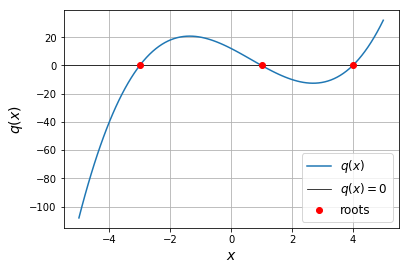

In [21]:
# plot the function with the roots labelled
fig, ax = plt.subplots()
ax.plot(xvals, q(xvals), label=r"$q(x)$")
ax.axhline(color='k', lw=0.75, label=r"$q(x) = 0$")
ax.plot(roots, [q(root) for root in roots], 'ro', label="roots")
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$q(x)$", fontsize=14)
ax.legend(fontsize=12)
ax.grid()
plt.show()

---
# ODEs

## Q5: orbits

We want to consider planetary orbits.  To do this, we need to solve Newton's second law together with Newton's law of gravity.  If we restrict ourselves to the x-y plane, then there are 4 quantities we need to solve for: $x$, $y$, $v_x$, and $v_y$.  These evolve according to:
\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

To integrate these forward in time, we need an initial condition for each quantity.  We'll setup our system such that the Sun is at the origin (that will be one focus), and the planet begins at perihelion and orbits counterclockwise. 

![geometry](orbit_setup.png)

The distance of perihelion from the focus is:
$$r_p = a (1 - e)$$
where $a$ is the semi-major axis and $e$ is the eccentricity.  The perihelion velocity is all in the $y$ direction and is:
$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

We'll work in units of AU, years, and solar masses, in which case, $GM_\star = 4\pi^2$ (for the Sun).  

Your initial conditions should be:
  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$

Here's a righthand side function for the ODEs:

In [22]:
def rhs(t, Y, GM=4*np.pi**2):
    """RHS for orbits, Y is the solution vector, containing
    x, y, v_x, and v_y"""

    x, y, vx, vy = Y
    f = np.zeros_like(Y)

    # dx/dt = vx
    f[0] = vx

    # dy/dt = vy
    f[1] = vy

    # d(vx)/dt = -GMx/r**3
    r = np.sqrt(x**2 + y**2)
    f[2] = -GM*x/r**3

    # d(vy)/dt = -GMy/r**3
    f[3] = -GM*y/r**3

    return f

Use the SciPy ODE integration methods to integrate an orbit and plot it

---
### My solution:

We will use `integrate.solve_ivp()`. 

We will need:

- A function of the form $f(t,y)$. 

    - Defined above as `rhs()`.


- The initial and final times, $(t_0, t_f)$. 

    - $t$ is measured in years, so choose $t_0 = 0$ and $t_f = 5$ years.


- The initial conditions in a list, in the order $x(0), y(0), v_x(0), v_y(0)$.

    - Will need to choose the semimajor axis $a$ and accentricity $e$.

In [23]:
def r_p(a=1., e=0.):
    """distance of perihelion from the focus.
    
    Parameters
    ----------
    a : float or int
        The semimajor axis, in AU.
    e : float or int
        The eccentricity of the orbit.
        
    Returns
    -------
    float
        The distance of the planet from the star at perihelion.
    """
    return a * (1. - e)


def v_p(a=1., e=0.):
    """orbital velocity at perihelion.
    
    Parameters
    ----------
    a : float or int
        The semimajor axis, in AU.
    e : float or int
        The eccentricity of the orbit.
        
    Returns
    -------
    float
        The orbital velocity of the planet at perihelion.
    """
    GM = 4. * np.pi**2
    return np.sqrt((GM/a) * (1. + e) / (1. - e))

In [24]:
a = 2.5
e = 0.5

t_init = 0.0
t_fin = 5.0

t_eval = np.linspace(t_init, t_fin, 2500, endpoint=True)

init_conditions = [r_p(a=a, e=e), 0., 0., v_p(a=a, e=e)] # x0, y0, v_x0, v_y0

Find the solution:

In [25]:
solution = integrate.solve_ivp(rhs, (t_init, t_fin), init_conditions, t_eval=t_eval)
t = solution.t
x, y, vx, vy = solution.y

Plot the orbit:

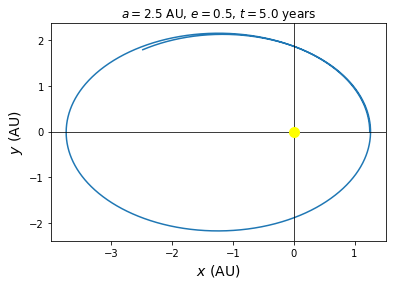

In [26]:
fig, ax = plt.subplots()
ax.set_title(r"$a = $" + "{:3.1f} AU, ".format(a) + r"$e = $" + "{:3.1f}, ".format(e) + r"$t = $" + "{:3.1f} years".format(t_fin-t_init))
ax.set_xlabel(r"$x$ (AU)", fontsize=14)
ax.set_ylabel(r"$y$ (AU)", fontsize=14)

ax.plot(x, y)
ax.axhline(color='k', lw=0.75)
ax.axvline(color='k', lw=0.75)
ax.plot(0, 0, 'o', color='yellow', markersize=10)

plt.show()

## <span class="fa fa-star"></span> Q6: damped driven pendulum and chaos

There are a large class of ODE integration methods available through the `scipy.integrate.ode()` function.  Not all of them provide _dense output_ -- most will just give you the value at the end of the integration.  

The explicit Runge-Kutta integrator will give you access to the solution at intermediate points and provides methods to interpolate to any value.  You enable this via `dense_output=True` (see the example in our out-of-class notebook).

The damped driven pendulum obeys the following equations:
$$\dot{\theta} = \omega$$
$$\dot{\omega} = -q \omega - \sin \theta + b \cos \omega_d t$$
here, $\theta$ is the angle of the pendulum from vertical and $\omega$ is the angular velocity.  $q$ is a damping coefficient, $b$ is a forcing amplitude, and $\omega_d$ is a driving frequency.

Choose $q = 0.5$ and $\omega_d = 2/3$.

Integrate the system for different values of $b$ (start with $b = 0.9$ and increase by $0.05$, and plot the results ($\theta$ vs. $t$).  Here's a RHS function to get you started:

In [27]:
def rhs(t, Y, q=0.5, omega_d=2./3., b=0.9):
        """ damped driven pendulum system derivatives.  Here, Y = (theta, omega) are
        the solution variables. """
        f = np.zeros_like(Y)

        
        f[0] = Y[1]
        f[1] = -q*Y[1] - np.sin(Y[0]) + b*np.cos(omega_d*t)

        return f

Note that the pendulum can flip over, giving values of $\theta$ outside of $[-\pi, \pi]$.  The following function can be used to restrict it back to $[-\pi, \pi]$ for plotting.

In [28]:
def restrict_theta(theta):
    """ convert theta to be restricted to lie between -pi and pi"""
    tnew = theta + np.pi
    tnew += -2.0*np.pi*np.floor(tnew/(2.0*np.pi))
    tnew -= np.pi
    return tnew

Write a function that takes an initial angle, $\theta_0$, and integrates the system and returns the solution.

Note, the righthand side function, `rhs`, takes additional arguments that you need to pass through the integrator.  The preferred method to do this with the `solve_ivp()` interface appears to be to use `functools.partial()`, as:
```
from functools import partial

r = solve_ivp(partial(rhs, q=q, omega_d=omega_d, b=b), ...)
```

Some values of $b$ will show very non-periodic behavior.  To see chaos, integrate two different pendula that are the same except for $\theta_0$, with only a small difference between then (like 60 degrees and 60.0001 degrees.  You'll see the solutions track for a while, but then diverge.

---
### My solution:
Set the constants $q, \omega_d$, and $b$:

In [29]:
# set q, omega_d
q = 0.5
omega_d = 2. / 3.

# set values of b
num_bvals = 13
b0 = 0.9  # lowest b value
db = 0.05 # step for b values
bvals = np.arange(b0, b0+num_bvals*db, db)
# choose set of colors to use when plotting each value of b
bcolors = ['darkred', 'crimson', 'red', 'darkorange', 'gold', 'yellowgreen',
          'limegreen', 'mediumturquoise', 'teal', 'royalblue',
          'darkviolet', 'mediumvioletred', 'deeppink']

Define a function to integrade the system, given an initial angle $\theta_0$ and a value of $b$.

In [30]:
from functools import partial

def integrate_sys(theta0, omega0, t_fin, b, q=q, omega_d=omega_d):
    """Solve the system of equations given above.
    
    Parameters
    ----------
    theta0 : float
        Initial value of the angle theta.
    omega0 : float
        Initial value of the angular velocity.
    t_fin : float
        The final time.
    b : float
        the forcing amplitude.
    q : float, default=0.5
        damping coefficient.
    omega_d : float, default=2./3.
        The driving frequency.
        
    """
    solution = integrate.solve_ivp(partial(rhs, q=q, omega_d=omega_d, b=b), 
                                   (0.0, t_fin), [theta0, omega0], dense_output=True)
    y = solution.sol # y is a function of t and returns theta, omega
    return y

Test using different values of b, with same initial conditions:

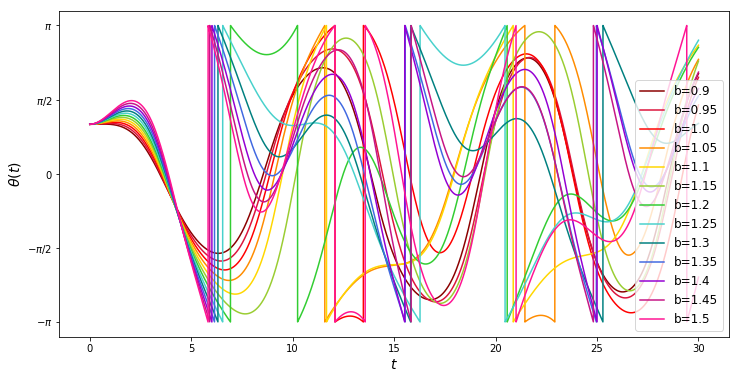

In [31]:
# initial conditions
theta0 = np.pi/3.
omega0 = 0.
t_max = 30.
t = np.linspace(0., t_max, 10000)

# make a plot
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel(r"$t$", fontsize=14)
ax.set_ylabel(r"$\theta(t)$", fontsize=14)

# plot theta(t) for each value of b
for b, color in zip(bvals, bcolors):
    y = integrate_sys(theta0, omega0, t_max, b) # y is a function of t, returns theta(t), omega(t)
    theta = y(t)[0]
    ax.plot(t, restrict_theta(theta), label="b={}".format(b), color=color)

# set the y ticks
yticks = [-np.pi, -np.pi/2., 0., np.pi/2., np.pi]
ylabels = [r"$-\pi$", r"$-\pi / 2$", r"$0$", r"$\pi / 2$", r"$\pi$"]
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
    
ax.legend(fontsize=12)
plt.show()

Now choose a single value of $b$ and choose two different values of $\theta_0$:

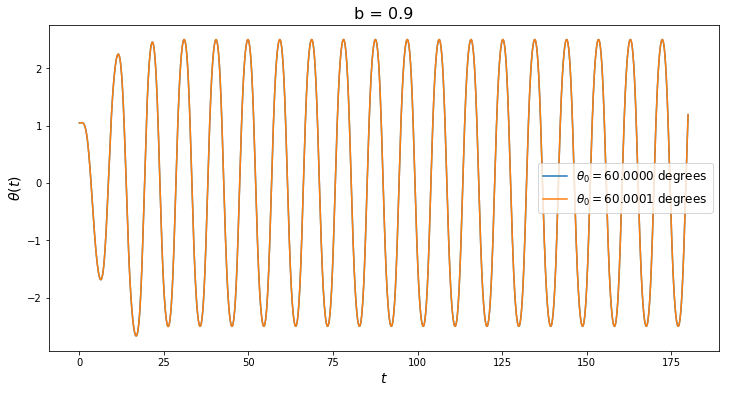

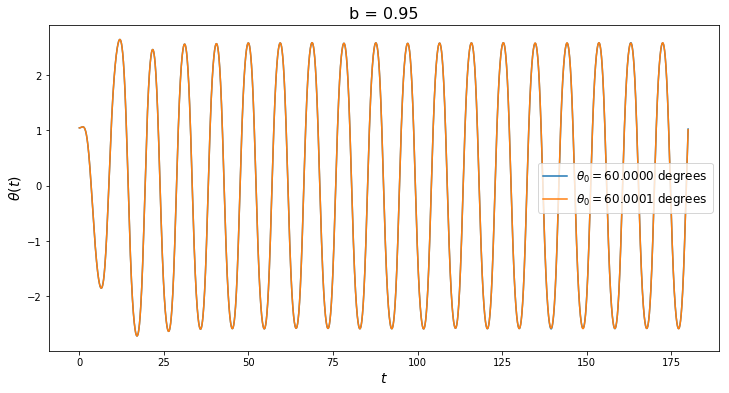

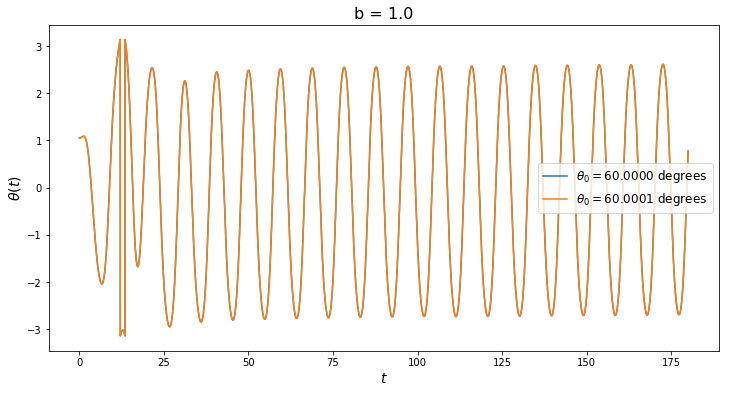

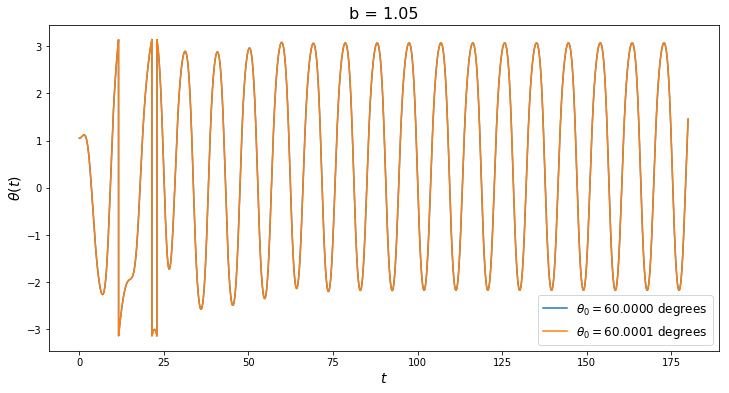

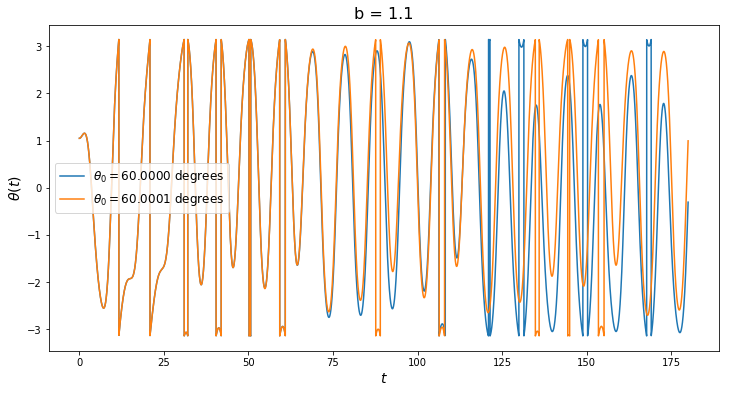

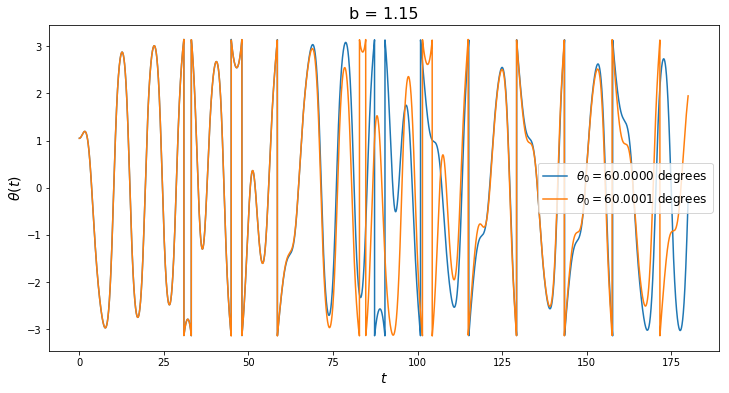

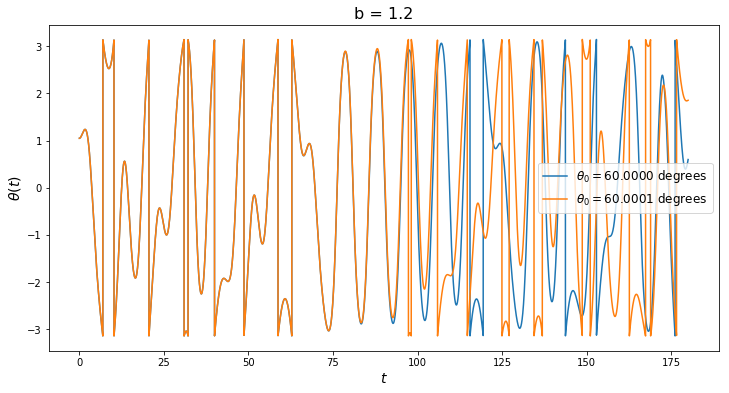

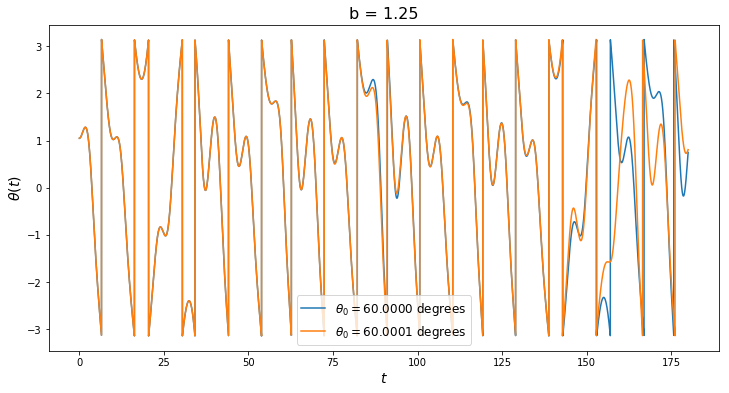

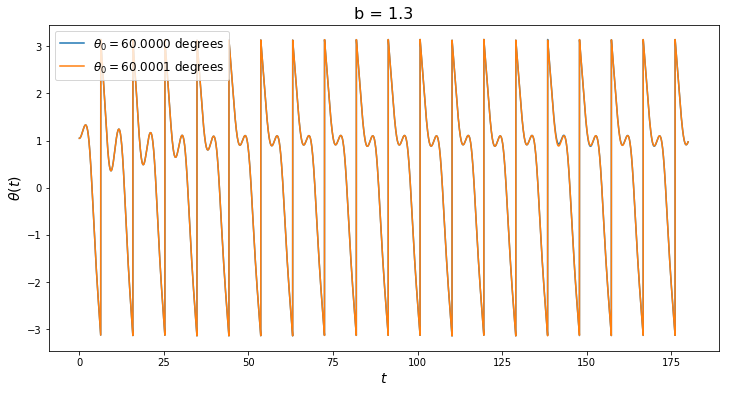

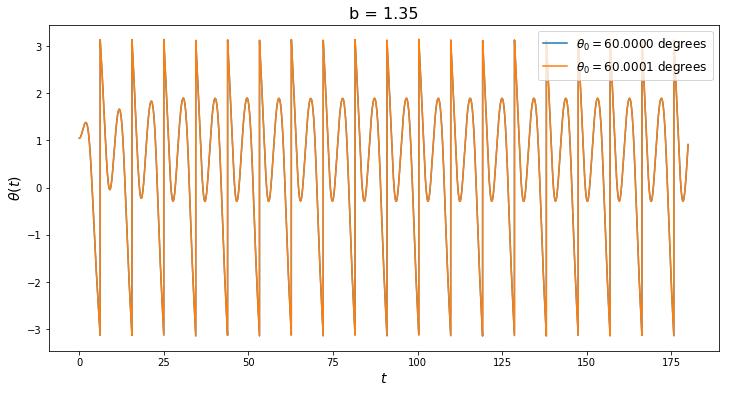

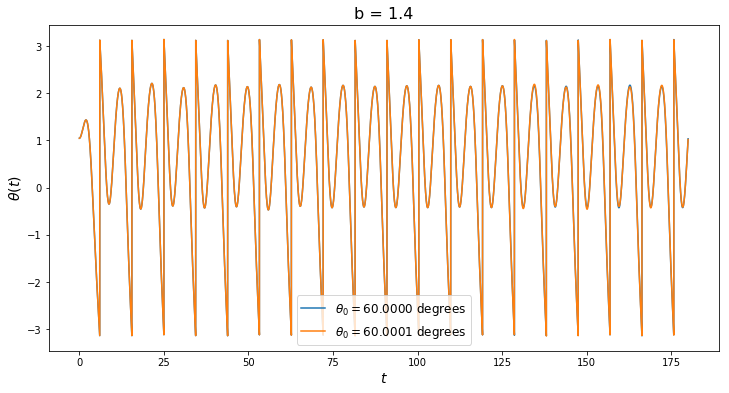

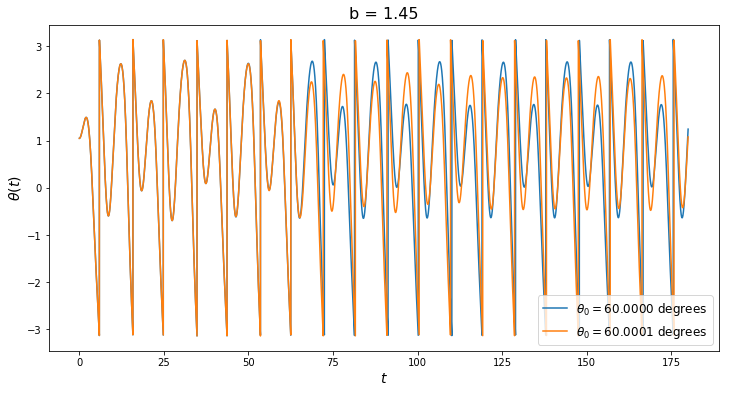

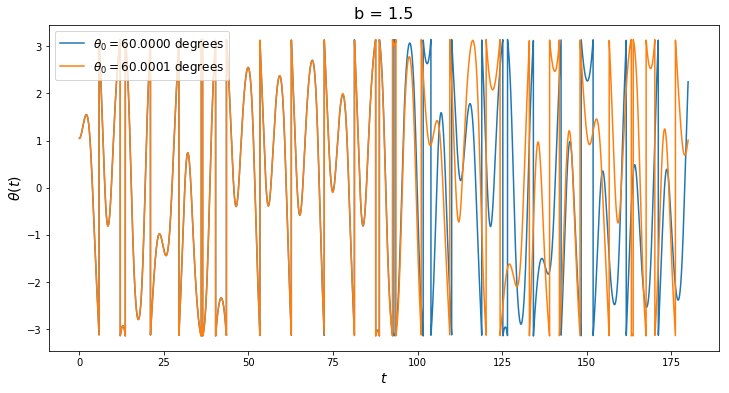

In [32]:
t_max = 180.
t = np.linspace(0., t_max, 10000)

# choose two initial values of theta
theta0_vals = [np.radians(60), np.radians(60.0001)]

for b in bvals:
    # make a plot
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("b = {}".format(b), fontsize=16)
    ax.set_xlabel(r"$t$", fontsize=14)
    ax.set_ylabel(r"$\theta(t)$", fontsize=14)


    # plot theta(t) for each value of b
    for theta0 in theta0_vals:
        y = integrate_sys(theta0, omega0, t_max, b) # y is a function of t, returns theta(t), omega(t)
        theta = y(t)[0]
        ax.plot(t, restrict_theta(theta), label=r"$\theta_0 = $"+"{:1.4f} degrees".format(np.degrees(theta0)))

    ax.legend(fontsize=12)
    plt.show()